In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import os

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 3s 0us/step


In [4]:
model = tf.keras.models.Sequential([
        Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

2021-08-15 16:51:32.191593: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-15 16:51:32.191626: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-15 16:51:32.191654: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (NOTYOURCOMPUTER): /proc/driver/nvidia/version does not exist
2021-08-15 16:51:32.192099: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['sparse_categorical_accuracy'])

In [9]:
history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=20,
              validation_data=(x_test, y_test),
              validation_freq=1)


2021-08-15 17:31:45.533059: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2021-08-15 17:31:45.796585: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-15 17:31:45.828883: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2593915000 Hz


Epoch 1/20
  2/469 [..............................] - ETA: 51s - loss: 2.2887 - sparse_categorical_accuracy: 0.1680 

2021-08-15 17:31:46.771315: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24774400 exceeds 10% of free system memory.
2021-08-15 17:31:46.773096: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24774400 exceeds 10% of free system memory.
2021-08-15 17:31:46.807751: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18972800 exceeds 10% of free system memory.
2021-08-15 17:31:46.888210: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24774400 exceeds 10% of free system memory.


469/469 [==============================] - 55s 115ms/step - loss: 0.3095 - sparse_categorical_accuracy: 0.9035 - val_loss: 0.0563 - val_sparse_categorical_accuracy: 0.9817
Epoch 2/20
469/469 [==============================] - 57s 122ms/step - loss: 0.0942 - sparse_categorical_accuracy: 0.9724 - val_loss: 0.0377 - val_sparse_categorical_accuracy: 0.9874
Epoch 3/20
469/469 [==============================] - 58s 125ms/step - loss: 0.0697 - sparse_categorical_accuracy: 0.9788 - val_loss: 0.0296 - val_sparse_categorical_accuracy: 0.9906
Epoch 4/20
469/469 [==============================] - 61s 130ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0.9825 - val_loss: 0.0253 - val_sparse_categorical_accuracy: 0.9916
Epoch 5/20
469/469 [==============================] - 58s 123ms/step - loss: 0.0502 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.0238 - val_sparse_categorical_accuracy: 0.9922
Epoch 6/20
469/469 [==============================] - 57s 121ms/step - loss: 0.0446 - sparse_cat

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

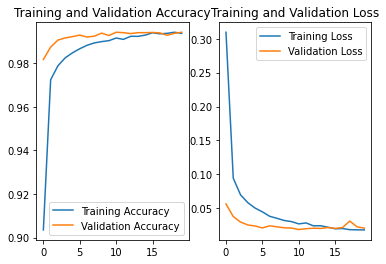

In [12]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [13]:
model.save('convolutional.h5')

In [16]:
sampleX = x_train[0]
sampley = y_train[0]
print(sampley)

5


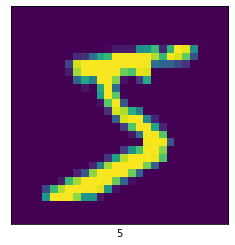

In [20]:
subplt = plt.subplot(1, 1, 1)
subplt.imshow(sampleX[:,:])  
subplt.set_xticks(())
subplt.set_yticks(())
subplt.set_xlabel(sampley)
plt.show()

In [21]:
a = tf.keras.models.load_model('convolutional.h5')

In [24]:
a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [34]:
x = sampleX.reshape(1, 28, 28, 1)
a(x)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[6.85076674e-17, 1.04545754e-10, 4.08028882e-18, 2.48492957e-04,
        5.81985088e-17, 9.99751508e-01, 6.31459971e-15, 8.69522119e-13,
        5.10991700e-11, 1.89934232e-11]], dtype=float32)>

In [27]:
sampleX.shape

(28, 28, 1)

In [31]:
a.classes

AttributeError: 'Sequential' object has no attribute 'classes'